In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPooling2D
import pickle



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set your data path and class labels
data_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/" # Replace with the path to your dataset
class_name = os.listdir(data_path)
class_name.sort()  # Sort class names
class_name = class_name[:13]



In [3]:
# Load and preprocess images
image_data = []
label_data = []

for count, folder in enumerate(class_name):
    folder_path = os.path.join(data_path, folder)
    images = os.listdir(folder_path)
    print("Loading Folder --", folder, "The Count of Classes ==> ", count)
    for img in images:
        image = cv2.imread(os.path.join(folder_path, img))
        image = cv2.resize(image, (100, 100))
        image_data.append(image)
        label_data.append(count)

print("---- Data Loading Done ----")



Loading Folder -- Apple___Apple_scab The Count of Classes ==>  0
Loading Folder -- Apple___Black_rot The Count of Classes ==>  1
Loading Folder -- Apple___Cedar_apple_rust The Count of Classes ==>  2
Loading Folder -- Apple___healthy The Count of Classes ==>  3
Loading Folder -- Blueberry___healthy The Count of Classes ==>  4
Loading Folder -- Cherry_(including_sour)___Powdery_mildew The Count of Classes ==>  5
Loading Folder -- Cherry_(including_sour)___healthy The Count of Classes ==>  6
Loading Folder -- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot The Count of Classes ==>  7
Loading Folder -- Corn_(maize)___Common_rust_ The Count of Classes ==>  8
Loading Folder -- Corn_(maize)___Northern_Leaf_Blight The Count of Classes ==>  9
Loading Folder -- Corn_(maize)___healthy The Count of Classes ==>  10
Loading Folder -- Grape___Black_rot The Count of Classes ==>  11
Loading Folder -- Grape___Esca_(Black_Measles) The Count of Classes ==>  12
---- Data Loading Done ----


In [4]:
# Convert data to NumPy arrays
data = np.array(image_data).astype("float32") / 255.0
label = np.array(label_data)



In [5]:
# Shuffle and split the dataset
x_img, y_img = shuffle(data, to_categorical(label, len(class_name)), random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8, random_state=42)



In [6]:
# Create and compile the CNN model
model = k.models.Sequential()

model.add(Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(32, (4, 4), activation="relu", padding="same"))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(len(class_name), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (AverageP  (None, 50, 50, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Averag  (None, 25, 25, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0

In [17]:
# Train the CNN model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)



Epoch 1/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0259 - accuracy: 0.9930 - val_loss: 0.2424 - val_accuracy: 0.9777
Epoch 2/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0269 - accuracy: 0.9921 - val_loss: 0.4908 - val_accuracy: 0.9711
Epoch 3/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.3156 - val_accuracy: 0.9750
Epoch 4/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.5503 - val_accuracy: 0.9734
Epoch 5/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.6707 - val_accuracy: 0.9738
Epoch 6/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.3802 - val_accuracy: 0.9719
Epoch 7/50
606/606 [==============================] - 6s 9ms/step - loss: 0.0421 - accuracy: 0.9888 - val_loss: 0.5175 - val_accuracy: 0.9736
Epoch 

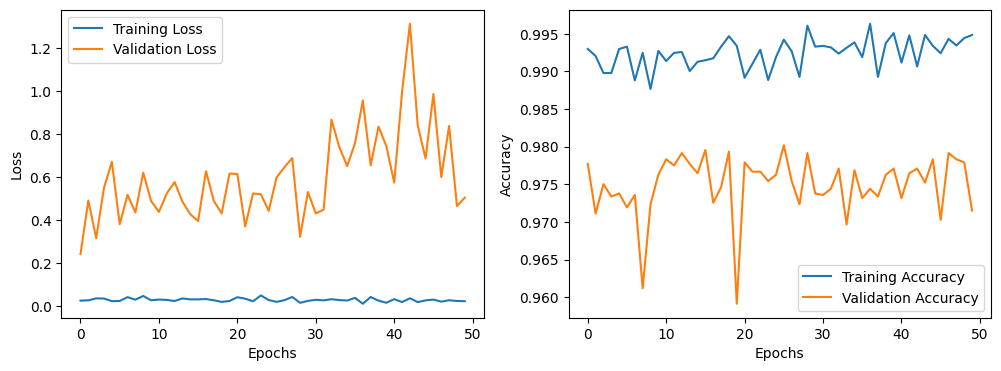

In [19]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [20]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy on Testing Data: {accuracy * 100:.2f}%")
print(f"Loss on Testing Data: {loss:.4f}")



152/152 [==============================] - 1s 5ms/step - loss: 0.5043 - accuracy: 0.9715
Accuracy on Testing Data: 97.15%
Loss on Testing Data: 0.5043


In [13]:
# Inference on a single image
def predict_single_image(image_path, model, class_names):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))
    image = image.astype("float32") / 255.0
    image = np.reshape(image, [1, 100, 100, 3])
    prediction = model.predict(image)[0]
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class



In [15]:
# Example of using predict_single_image
image_path = input()  # Replace with the path to your image
predicted_class = predict_single_image(image_path, model, class_name)
print(f"Predicted Class: {predicted_class}")


 /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG


1/1 [==============================] - 0s 177ms/step
Predicted Class: Cherry_(including_sour)___Powdery_mildew
